In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [191]:
#df = pd.read_csv(r'C:/Users/elaaf/Desktop/SDS/Project_2/Data Cleaning/ALL_partially_clean.csv', index_col=0)

In [366]:
df = pd.read_csv('cleaned_cities.csv')

In [367]:
df.shape

(1864, 171)

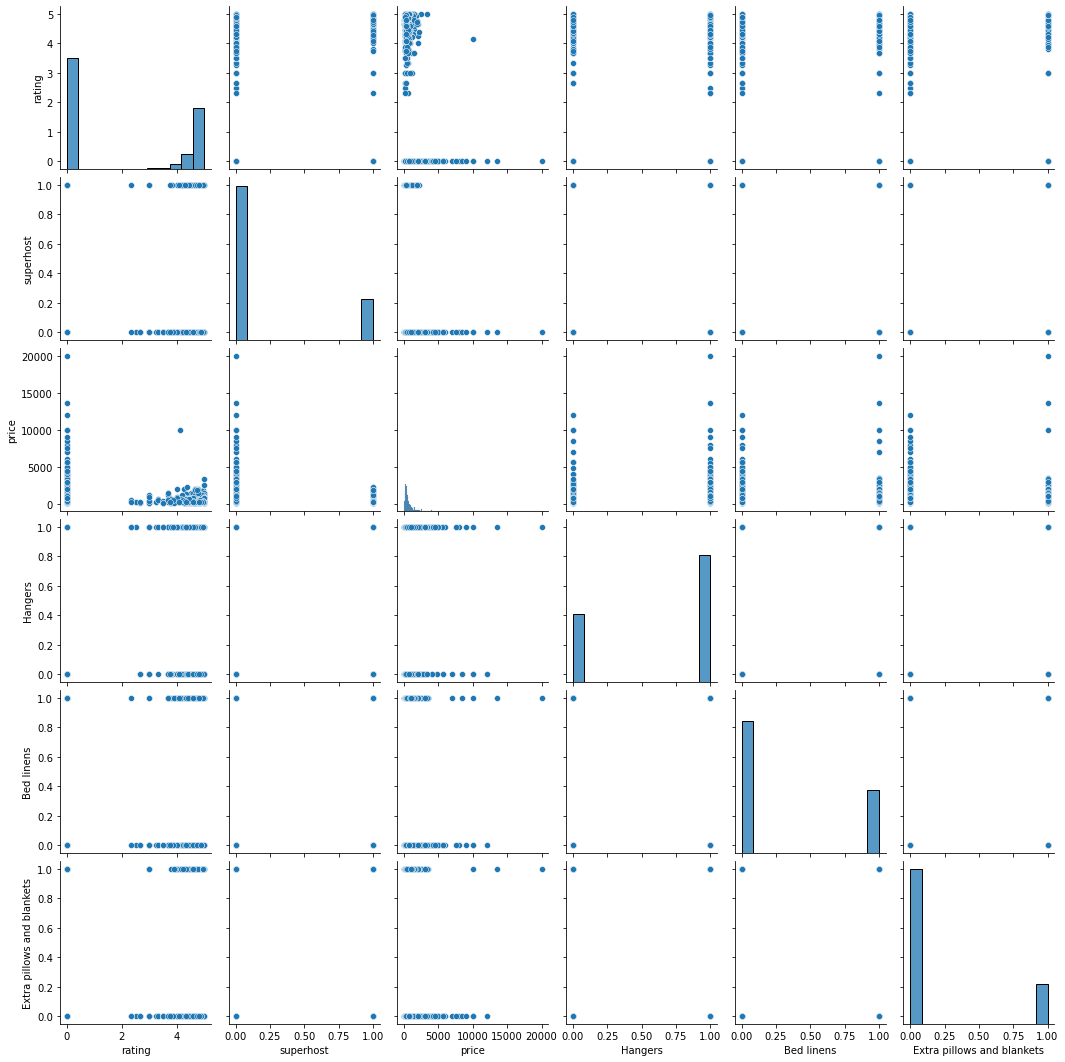

In [361]:
sns.pairplot(df.iloc[:,:10])

In [364]:
test = df[df.rating != 0]

In [365]:
test.shape

(799, 144)

In [266]:
def find_and_remove(name, df):
    print('data size before {}.'.format(df.shape))
    col_to_remove = [x for x in L if name.lower() in x.lower()]
    
    sz = len(col_to_remove)
    if sz>1:
        print('We are about to remove {} columns.'.format(sz))
        df[name] = 0

        for e in col_to_remove:
            try:
                df[name] += df[e]
            except:
                continue
                
        for i in col_to_remove:
            try:
                df.drop(columns=i, inplace=True)
            except:
                continue
        
        print('data size after {}.'.format(df.shape))
    else:
        print('column is not found')
        
    if df[df[name] > 1].shape[0] != 0:
        print('# some values sum to more than 1')
        df[name].loc[df[name] > 1] = 1
    return df



In [283]:
L = df.columns
[i for i in L.sort_values()]

['Baking sheet',
 'Barbecue utensils',
 'Bathtub',
 'Beach essentials',
 'Bed linens',
 'Bed_num',
 'Bidet',
 'Bikes',
 'Blender',
 'Board games',
 'Boat slip',
 'Books and reading material',
 'Bread maker',
 'Breakfast',
 'Building staff',
 'Carbon monoxide alarm',
 'Ceiling fan',
 'Central heating',
 'Changing table',
 'Children’s dinnerware',
 'Cleaning before checkout',
 'Cleaning products',
 'Cooking basics',
 'Crib',
 'Dining table',
 'Dishes and silverware',
 'Drying rack for clothing',
 'EV charger',
 'Elevator',
 'Essentials',
 'Ethernet connection',
 'Extra pillows and blankets',
 'Fire extinguisher',
 'Fire pit',
 'Fireplace guards',
 'First aid kit',
 'Free driveway parking on premises',
 'Free resort access',
 'Free street parking',
 'Freezer',
 'Hammock',
 'Hangers',
 'Heating',
 'High chair',
 'Host greets you',
 'Hot tub',
 'Hot water',
 'Hot water kettle',
 'Iron',
 'Kayak',
 'Keypad',
 'Lake access',
 'Laundromat nearby',
 'Lock on bedroom door',
 'Lockbox',
 'Long te

In [273]:
df.shape

(1864, 153)

In [282]:
df = find_and_remove('balcony', df)

data size before (1864, 147).
We are about to remove 3 columns.
data size after (1864, 145).


In [323]:
df.columns

Index(['Unnamed: 0', 'rating', 'city', 'province', 'superhost', 'price',
       'house_type', 'link', 'Hangers', 'Bed linens',
       ...
       'game console', 'guest_num', 'bath_num', 'id', 'pool', 'backyard',
       'free carport', 'ski-in', 'beach access', 'balcony'],
      dtype='object', length=145)

In [324]:
df = df.set_index('Unnamed: 0')

In [329]:
int(False)

0

In [337]:
df['superhost'] = pd.Series([int(x) for x in df['superhost']])

ValueError: cannot convert float NaN to integer

In [343]:
df.columns

Index(['rating', 'city', 'province', 'superhost', 'price', 'house_type',
       'link', 'Hangers', 'Bed linens', 'Extra pillows and blankets',
       ...
       'game console', 'guest_num', 'bath_num', 'id', 'pool', 'backyard',
       'free carport', 'ski-in', 'beach access', 'balcony'],
      dtype='object', length=144)

In [347]:
df.index.name = 'index'

In [349]:
df.to_csv('cleaned_v5.csv')

In [335]:
df['house_type'].unique()

array(['Earth house', 'Entire chalet', 'Shared room in chalet',
       'Private room in resort', 'Entire villa', 'Farm stay',
       'Entire rental unit', 'Entire loft', 'Tiny house',
       'Entire residential home', 'Private room in farm stay',
       'Entire condominium (condo)', 'Private room in rental unit',
       'Room in aparthotel', 'Shared room in tent', 'Entire guest suite',
       'Entire serviced apartment', 'Casa particular',
       'Shared room in condominium (condo)', 'Entire cottage',
       'Entire place', 'Shared room in bed and breakfast',
       'Private room in guest suite', 'Room in boutique hotel',
       'Private room in serviced apartment', 'Entire guesthouse',
       'Entire cabin', 'Room in hotel', 'Private room in loft',
       'Private room in bed and breakfast', 'Camper/RV',
       'Entire bungalow', 'Private room in condominium (condo)',
       'Lighthouse', 'Private room in residential home',
       'Shared room in rental unit', 'Private room in townhou

In [350]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1864 entries, 0 to 1864
Data columns (total 144 columns):
 #    Column                             Non-Null Count  Dtype  
---   ------                             --------------  -----  
 0    rating                             1864 non-null   float64
 1    city                               1864 non-null   object 
 2    province                           1864 non-null   object 
 3    superhost                          1863 non-null   float64
 4    price                              1864 non-null   int64  
 5    house_type                         1864 non-null   object 
 6    link                               1864 non-null   object 
 7    Hangers                            1864 non-null   int64  
 8    Bed linens                         1864 non-null   int64  
 9    Extra pillows and blankets         1864 non-null   int64  
 10   Room-darkening shades              1864 non-null   int64  
 11   Suitable for events                1864 n

C:\Users\elaaf\AppData\Local\Temp/ipykernel_18776/2612161665.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  df.info(verbose=True, null_counts=True)


In [296]:
df_corr = df.corr()['price'].reset_index()

In [298]:
df_corr.columns

Index(['index', 'price'], dtype='object')

In [308]:
df_corr.sort_values(by='price')[::-1].head(50)

,index,price
26,Essentials,NaN
22,Security cameras on property,NaN
3,price,1.000000
99,Beach essentials,0.473875
132,guest_num,0.407779
133,bath_num,0.333283
134,pool,0.300108
104,bedroom_num,0.241583
100,Private sauna,0.205941
76,Waterfront,0.198245


In [314]:
sum(df['Essentials'].isna())

0

In [ ]:
isna

In [231]:
df_test = df.copy(deep=True)

In [277]:
df_test = find_and_remove('ski-in', df_test)

NameError: name 'df_test' is not defined

In [233]:
df_test = find_and_remove('coffee', df_test)

data size before (4928, 516).
We are about to remove 17 columns.
data size after (4928, 500).
# some values sum to more than 1


In [234]:
len(df_test[df_test['coffee'] > 1]['coffee'] )

0

In [235]:
df_test = find_and_remove('shampoo', df_test)

data size before (4928, 500).
We are about to remove 35 columns.
data size after (4928, 466).
# some values sum to more than 1


In [236]:
df_test = find_and_remove('soap', df_test)

data size before (4928, 466).
We are about to remove 40 columns.
data size after (4928, 429).


In [237]:
df_test = find_and_remove('conditioner', df_test)

data size before (4928, 429).
We are about to remove 23 columns.
data size after (4928, 407).


In [238]:
df_test = find_and_remove('dedicated workspace', df_test)

data size before (4928, 407).
We are about to remove 38 columns.
data size after (4928, 370).


In [239]:
df_test = find_and_remove('stove', df_test)

data size before (4928, 370).
We are about to remove 21 columns.
data size after (4928, 350).


In [240]:
df_test = find_and_remove('gym', df_test)

data size before (4928, 350).
We are about to remove 6 columns.
data size after (4928, 345).


In [241]:
df_test = find_and_remove('indoor fireplace', df_test)

data size before (4928, 345).
We are about to remove 4 columns.
data size after (4928, 342).


In [242]:
df_test = find_and_remove('kitchen', df_test)

data size before (4928, 342).
We are about to remove 4 columns.
data size after (4928, 339).
# some values sum to more than 1


In [243]:
df_test = find_and_remove('wifi', df_test)

data size before (4928, 339).
We are about to remove 12 columns.
data size after (4928, 328).
# some values sum to more than 1


In [244]:
df_test = find_and_remove('clothing storage', df_test)

data size before (4928, 328).
We are about to remove 38 columns.
data size after (4928, 291).


In [245]:
df_test = find_and_remove('refrigerator', df_test)

data size before (4928, 291).
We are about to remove 25 columns.
data size after (4928, 267).


In [246]:
df_test = find_and_remove('exercise equipment', df_test)

data size before (4928, 267).
We are about to remove 11 columns.
data size after (4928, 257).


In [247]:
df_test = find_and_remove('paid parking', df_test)

data size before (4928, 257).
We are about to remove 7 columns.
data size after (4928, 251).
# some values sum to more than 1


In [248]:
df_test = find_and_remove('free parking', df_test)

data size before (4928, 251).
We are about to remove 5 columns.
data size after (4928, 247).


In [249]:
df_test = find_and_remove('children’s books and toys', df_test)

data size before (4928, 247).
We are about to remove 8 columns.
data size after (4928, 240).


In [250]:
df_test = find_and_remove('oven', df_test)

data size before (4928, 240).
We are about to remove 12 columns.
data size after (4928, 229).


In [251]:
df_test = find_and_remove('washer', df_test)

data size before (4928, 229).
We are about to remove 9 columns.
data size after (4928, 221).
# some values sum to more than 1


In [252]:
 df_test = find_and_remove('sound system', df_test)

data size before (4928, 221).
We are about to remove 15 columns.
data size after (4928, 208).


In [253]:
 df_test = find_and_remove('bbq grill', df_test)

data size before (4928, 208).
We are about to remove 3 columns.
data size after (4928, 206).


In [254]:
 df_test = find_and_remove('dryer', df_test)

data size before (4928, 206).
We are about to remove 8 columns.
data size after (4928, 199).
# some values sum to more than 1


In [255]:
df_test = find_and_remove('baby', df_test)

data size before (4928, 199).
We are about to remove 4 columns.
data size after (4928, 196).
# some values sum to more than 1


In [256]:
 df_test = find_and_remove('view', df_test)

data size before (4928, 196).
We are about to remove 19 columns.
data size after (4928, 178).
# some values sum to more than 1


In [257]:
df_test = find_and_remove('free residential garage', df_test)

data size before (4928, 178).
We are about to remove 3 columns.
data size after (4928, 176).


In [258]:
df_test = find_and_remove('air conditioning', df_test)

data size before (4928, 176).
We are about to remove 3 columns.
data size after (4928, 174).
# some values sum to more than 1


In [259]:
df_test = find_and_remove('game console', df_test)

data size before (4928, 174).
We are about to remove 4 columns.
data size after (4928, 171).


In [269]:
df_test.shape

(4928, 171)

In [ ]:
df_test.groupby(['city'])[]

In [294]:
df_test['city'].unique()

array(['Buraydah', 'المليداء', 'بريدة', 'الغماس', 'بريده', 'Riyadh',
       'Al Duwadimi', 'Jeddah', 'Mecca', 'Medina', 'Umluj',
       'King Abdullah Economic City', 'Makkah Province', 'Khamis Mushait',
       'Dammam', 'Hafar Al Batin', 'Al Khobar', 'Tabuk', 'Yanbu',
       'Rabigh', 'Ad Diriyah', 'جدة', 'الرياض', 'Baish', 'مكة',
       'Howtat Bani Tamim', 'AlUla', 'Yanbu Al Bahr', 'Abha', 'القاعد',
       'المدينة المنورة', 'Makkah', 'Al Qatif', 'وادي قنطان', 'Al-Kharj',
       'Al Namas', 'Aziziah', 'العلا', 'Khafji', 'Dhahran', 'Al Hamra',
       'الدمام', 'Arrakah', 'Eastern Province', 'Saudi Arabia',
       'Al Aziziyah', 'درة العروس', 'Dahaban', 'جدّة\u200e', 'الدرعية',
       'Al Khuzama', 'أبها', 'Sarat Abidah', 'Ahad Rafidah', 'أحد رفيدة',
       'Tamniah', 'خميس مشيط', 'Khmis Mshit', 'Forest Al Gorah',
       'Al Wadeen', 'Thadiq', 'Malham', 'Al Deriaa', 'البير',
       'Riyadh Province', 'Al Jubaylah', 'JEDDAH', 'المدينة المنوره',
       'Ar Rummanah', 'Madinah', 'king Ab

In [287]:
df_test.shape

(4928, 171)

In [288]:
4300.0/4928 * 100

87.2564935064935

In [193]:
df_test.groupby('province')['price'].count().sort_values()

NameError: name 'df_test' is not defined

In [3]:
data = pd.read_csv('cleaned_data.csv')

In [58]:
data['city'] = pd.Series([x.lower().strip("'").replace(' ', '').replace('-', '') for x in data['city']])

In [244]:
df_city_count = data.groupby('city')['price'].count().sort_values().reset_index()

In [245]:
cities = df_city_count['city']

In [246]:
cities = [x for x in cities]

In [247]:
cities.sort()

In [248]:
cities

['abha',
 'alduwadimi',
 'aljubail',
 'alkharj',
 'alkhobar',
 'almithnab',
 'almuzahmiya',
 'alnamas',
 'alqaid',
 'alqatif',
 'alwadeen',
 'bahrah',
 'baish',
 'buraydah',
 'dammam',
 'dhahran',
 'forestalgorah',
 'hafaralbatin',
 'howtatbanitamim',
 'jeddah',
 'kaec',
 'khafji',
 'khamismushait',
 'khulais',
 'malham',
 'mecca',
 'medina',
 'muhayriqah',
 'mulayda',
 'rabigh',
 'riyadh',
 'saratabidah',
 'tabuk',
 'taif',
 'tamniah',
 'thadiq',
 'thuwal',
 'ula',
 'umluj',
 'unayzah',
 'yanbu']

In [259]:
len(cities)

41

In [258]:
data[data['city'] == 'unayzah']['link']
#i = data[data['city'] == 'dahaban'].index

1788    https://www.airbnb.com/rooms/47424067?previous...
1789    https://www.airbnb.com/rooms/51677945?previous...
1791    https://www.airbnb.com/rooms/38173728?previous...
1792    https://www.airbnb.com/rooms/31282230?previous...
1793    https://www.airbnb.com/rooms/26636885?previous...
1794    https://www.airbnb.com/rooms/38174269?previous...
1795    https://www.airbnb.com/rooms/46432494?previous...
Name: link, dtype: object

In [336]:
data.to_csv('cleaned_cities_and_superhost.csv')

In [241]:
data.loc[i ,'city'] = 'jeddah'

In [159]:
#data.drop(1197, inplace=True)

In [ ]:
#alqaid??? HAIL

In [243]:
data.iloc[i]['link']

470    https://www.airbnb.com/rooms/48745359?previous...
473    https://www.airbnb.com/rooms/44548201?previous...
474    https://www.airbnb.com/rooms/46699725?previous...
477    https://www.airbnb.com/rooms/51118960?previous...
482    https://www.airbnb.com/rooms/52325070?previous...
485    https://www.airbnb.com/rooms/47561572?previous...
486    https://www.airbnb.com/rooms/41571641?previous...
487    https://www.airbnb.com/rooms/42619874?previous...
489    https://www.airbnb.com/rooms/50931273?previous...
497    https://www.airbnb.com/rooms/50933558?previous...
499    https://www.airbnb.com/rooms/50053924?previous...
500    https://www.airbnb.com/rooms/50327784?previous...
501    https://www.airbnb.com/rooms/45402722?previous...
505    https://www.airbnb.com/rooms/50182039?previous...
507    https://www.airbnb.com/rooms/48245830?previous...
509    https://www.airbnb.com/rooms/44551984?previous...
510    https://www.airbnb.com/rooms/28846266?previous...
Name: link, dtype: object

### OLD

In [5]:


columns_to_combine_tv = ['32" HDTV',
 '48" HDTV with Netflix, premium cable, HBO Max, Apple TV',
 '49" TV',
 '50" HDTV',
 '50" HDTV with standard cable, Amazon Prime Video, Apple TV, Netflix',
 '50" TV with Netflix',
 '53" HDTV with Disney+, Netflix, Apple TV',
 '55" HDTV',
 '55" HDTV with Apple TV, Amazon Prime Video, Netflix',
 '55" HDTV with Netflix',
 '55" HDTV with Netflix, standard cable',
 '55" HDTV with Roku, Amazon Prime Video, HBO Max, premium cable, Disney+, Fire TV, standard cable, Hulu, Netflix, Apple TV, Chromecast',
 '58" HDTV with Netflix',
 '65" HDTV',
 '65" HDTV with Amazon Prime Video',
 '65" HDTV with Amazon Prime Video, Chromecast, Netflix',
 '65" HDTV with Chromecast, premium cable, Netflix, Amazon Prime Video',
 '65" HDTV with HBO Max, Netflix',
 '65" HDTV with Netflix',
 '65" HDTV with Netflix, Amazon Prime Video, Apple TV',
 '65" HDTV with Netflix, standard cable',
 '65" TV with Netflix',
 '75" HDTV',
 '86" HDTV with Netflix, standard cable', 
 'HDTV',
 'HDTV with Amazon Prime Video, Chromecast, Netflix, premium cable',
 'HDTV with Amazon Prime Video, Netflix',
 'HDTV with Amazon Prime Video, Netflix, standard cable',
 'HDTV with Apple TV, Netflix',
 'HDTV with Chromecast, Apple TV, Netflix, Hulu, premium cable',
 'HDTV with Chromecast, Netflix',
 'HDTV with Disney+',
 'HDTV with Disney+, Netflix, Amazon Prime Video, Chromecast, Apple TV',
 'HDTV with Netflix',
 'HDTV with Netflix, Amazon Prime Video',
 'HDTV with Netflix, Apple TV',
 'HDTV with Netflix, standard cable',
 'HDTV with Netflix, standard cable, premium cable, Chromecast',
 'HDTV with premium cable',
 'HDTV with standard cable',
 'HDTV with standard cable, Netflix',
 'TV',
 'TV with Amazon Prime Video, Apple TV, Chromecast, Disney+, Fire TV, HBO Max, Hulu, Netflix, premium cable, Roku, standard cable',
 'TV with Chromecast',
 'TV with Netflix, premium cable',
 'TV with standard cable']

In [52]:
len(columns_to_combine_tv)

46

In [54]:
df_test['TV_combined'] = 0

In [55]:

for e in columns_to_combine_tv:
    df_test['TV_combined'] += df_test[e]

In [56]:
df_test.shape

(2557, 482)

In [31]:
df_test[df_test['tv'] > 1].shape[0]

0

In [58]:
df_test.drop(columns=columns_to_combine_tv, inplace=True)

In [59]:
df_test.shape

(2557, 436)

In [60]:
[i for i in L.sort_values()]

['. body soap',
 '. conditioner',
 '. refrigerator',
 '. shampoo',
 '32" HDTV',
 '48" HDTV with Netflix, premium cable, HBO Max, Apple TV',
 '49" TV',
 '50" HDTV',
 '50" HDTV with standard cable, Amazon Prime Video, Apple TV, Netflix',
 '50" TV with Netflix',
 '53" HDTV with Disney+, Netflix, Apple TV',
 '55" HDTV',
 '55" HDTV with Apple TV, Amazon Prime Video, Netflix',
 '55" HDTV with Netflix',
 '55" HDTV with Netflix, standard cable',
 '55" HDTV with Roku, Amazon Prime Video, HBO Max, premium cable, Disney+, Fire TV, standard cable, Hulu, Netflix, Apple TV, Chromecast',
 '58" HDTV with Netflix',
 '65" HDTV',
 '65" HDTV with Amazon Prime Video',
 '65" HDTV with Amazon Prime Video, Chromecast, Netflix',
 '65" HDTV with Chromecast, premium cable, Netflix, Amazon Prime Video',
 '65" HDTV with HBO Max, Netflix',
 '65" HDTV with Netflix',
 '65" HDTV with Netflix, Amazon Prime Video, Apple TV',
 '65" HDTV with Netflix, standard cable',
 '65" TV with Netflix',
 '75" HDTV',
 '86" HDTV with N

In [61]:
[x for x in L if 'shampoo' in x.lower()]

['Shampoo',
 'Pantene Anti Hairfall shampoo',
 'على حسب shampoo',
 '. shampoo',
 'شولدر shampoo',
 'الفرسان shampoo',
 'Hand&shoulders shampoo',
 'LUX shampoo',
 'Head & Shoulders shampoo',
 'soap shampoo',
 'Dove shampoo',
 'البيلسان shampoo',
 'فندقية shampoo',
 'X shampoo',
 'Marvelous shampoo',
 'head and sholders shampoo',
 'دوڤ shampoo',
 'Multiple  shampoo',
 'Garnier shampoo shampoo',
 'Garnier shampoo body soap',
 'LOCAL shampoo',
 'Hotel shampoo']

In [44]:
shampoo_combine = ['Shampoo',
 'Pantene Anti Hairfall shampoo',
 'على حسب shampoo',
 '. shampoo',
 'شولدر shampoo',
 'الفرسان shampoo',
 'Hand&shoulders shampoo',
 'LUX shampoo',
 'Head & Shoulders shampoo',
 'soap shampoo',
 'Dove shampoo',
 'البيلسان shampoo',
 'فندقية shampoo',
 'X shampoo',
 'Marvelous shampoo',
 'head and sholders shampoo',
 'دوڤ shampoo',
 'Multiple  shampoo',
 'Garnier shampoo shampoo',
 'Garnier shampoo body soap',
 'LOCAL shampoo',
 'Hotel shampoo']

In [62]:
len(shampoo_combine)

22

In [63]:
df_test['shampoo_combined'] = 0

for e in shampoo_combine:
    try:
        df_test['shampoo_combined'] += df_test[e]
    except:
        continue
df_test.drop(columns=shampoo_combine, inplace=True)

In [64]:
df_test.shape

(2557, 415)

In [69]:
soap = [x for x in L if 'soap' in x.lower()]

In [70]:
len(soap)

30

In [72]:
df_test['soap'] = 0

for e in soap:
    try:
        df_test['soap'] += df_test[e]
    except:
        continue


In [78]:
#df_test.drop(columns=soap, inplace=True)

In [75]:
soap

['Body soap',
 'على حسب body soap',
 '. body soap',
 'شولدر body soap',
 'ديتول body soap',
 'الفرسان body soap',
 'صابون فندقي  body soap',
 'LUX body soap',
 'Lux body soap',
 'soap shampoo',
 'argan body soap',
 'Dove body soap',
 'البيلسان body soap',
 'فندقية body soap',
 'X body soap',
 'دوڤ body soap',
 'Marvelous  body soap',
 'head and shoulders body soap',
 'جل استحمام سائل body soap',
 'ديتول  body soap',
 'صابون مغربي  body soap',
 'Garnier shampoo body soap',
 'Johnson, herbal essence , Dove and other international brand  body soap',
 'لايف بوي body soap',
 'صابون لغسل اليدين  body soap',
 'Lifeboy body soap',
 'LOCAL body soap',
 'Luxe body soap',
 'Hotel body soap',
 'louts  body soap']

In [77]:
df_test.shape

(2557, 416)

In [79]:
df_test[df_test['soap'] > 1]

,rating,city,province,superhost,price,house_type,link,guests,baths,Washer,...,Free washer – In building,"Dedicated workspace: desk, office chair, and table",Dedicated workspace: table and desk,"Dedicated workspace: office chair, monitor, table, and desk","Dedicated workspace: table, desk, and office chair",Bed_num,bedroom_num,TV_combined,shampoo_combined,soap


In [80]:
refrigerator = [x for x in L if 'refrigerator' in x.lower()]

In [81]:
len(refrigerator)

19

In [82]:
df_test['refrigerator'] = 0

for e in refrigerator:
    try:
        df_test['soap'] += df_test[e]
    except:
        continue


In [83]:
df_test.drop(columns=refrigerator, inplace=True)

In [ ]:
df_test.shape

NameError: name 'df_test' is not defined

data size before (2557, 436).
We are about to remove (2557, 436) columns.


KeyError: '[\'TV\' \'TV with standard cable\' \'HDTV\' \'65" HDTV with Amazon Prime Video\'\n \'65" TV with Netflix\'\n \'65" HDTV with Netflix, Amazon Prime Video, Apple TV\' \'55" HDTV\'\n \'HDTV with Amazon Prime Video, Netflix\'\n \'HDTV with Chromecast, Apple TV, Netflix, Hulu, premium cable\'\n \'65" HDTV with HBO Max, Netflix\' \'TV with Chromecast\'\n \'55" HDTV with Netflix\'\n \'55" HDTV with Roku, Amazon Prime Video, HBO Max, premium cable, Disney+, Fire TV, standard cable, Hulu, Netflix, Apple TV, Chromecast\'\n \'HDTV with Netflix, Amazon Prime Video\' \'65" HDTV\' \'HDTV with Netflix\'\n \'58" HDTV with Netflix\'\n \'HDTV with Disney+, Netflix, Amazon Prime Video, Chromecast, Apple TV\'\n \'HDTV with premium cable\'\n \'65" HDTV with Amazon Prime Video, Chromecast, Netflix\' \'50" HDTV\'\n \'75" HDTV\'\n \'HDTV with Amazon Prime Video, Chromecast, Netflix, premium cable\'\n \'TV with Amazon Prime Video, Apple TV, Chromecast, Disney+, Fire TV, HBO Max, Hulu, Netflix, premium cable, Roku, standard cable\'\n \'50" TV with Netflix\' \'32" HDTV\' \'65" HDTV with Netflix, standard cable\'\n \'HDTV with Netflix, standard cable\'\n \'HDTV with Amazon Prime Video, Netflix, standard cable\'\n \'55" HDTV with Netflix, standard cable\'\n \'53" HDTV with Disney+, Netflix, Apple TV\'\n \'55" HDTV with Apple TV, Amazon Prime Video, Netflix\'\n \'48" HDTV with Netflix, premium cable, HBO Max, Apple TV\'\n \'HDTV with Netflix, Apple TV\'\n \'HDTV with Netflix, standard cable, premium cable, Chromecast\'\n \'86" HDTV with Netflix, standard cable\' \'65" HDTV with Netflix\'\n \'HDTV with Apple TV, Netflix\'\n \'50" HDTV with standard cable, Amazon Prime Video, Apple TV, Netflix\'\n \'TV with Netflix, premium cable\' \'HDTV with Disney+\'\n \'HDTV with standard cable, Netflix\' \'HDTV with Chromecast, Netflix\'\n \'65" HDTV with Chromecast, premium cable, Netflix, Amazon Prime Video\'\n \'49" TV\' \'HDTV with standard cable\'] not found in axis'